In [36]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline

In [37]:
data = pd.read_csv('average-commute-times.csv', low_memory=False)

In [38]:
data.head()

,census_geo_id,zip_code,census_display,commute_time_mins,rank,zip_ranking,city,state,lat,long,avg_state,avg_city
0,8600000US63057,63057,ZCTA5 63057,1.2,1,99,LIGUORI,MO,38.33,-90.43,26.3,1.2
1,8600000US95646,95646,ZCTA5 95646,2.1,2,99,KIRKWOOD,CA,38.69,-120.05,27.0,2.1
2,8600000US99548,99548,ZCTA5 99548,2.1,3,99,CHIGNIK LAKE,AK,56.23,-158.74,11.0,2.1
3,8600000US99575,99575,ZCTA5 99575,2.2,4,99,CROOKED CREEK,AK,61.86,-157.99,11.0,2.2
4,8600000US99546,99546,ZCTA5 99546,2.9,5,99,ADAK,AK,51.90,-176.67,11.0,2.9


In [39]:
data.dtypes

census_geo_id         object
zip_code               int64
census_display        object
commute_time_mins    float64
rank                   int64
zip_ranking            int64
city                  object
state                 object
lat                  float64
long                 float64
avg_state            float64
avg_city             float64
dtype: object

In [40]:
def convert_to_zip(code):    
    return code[9:len(code)]

In [41]:
data = data.drop(['zip_code', 'census_display', 'city', 'lat', 'long'], axis=1)
data.head()

,census_geo_id,commute_time_mins,rank,zip_ranking,state,avg_state,avg_city
0,8600000US63057,1.2,1,99,MO,26.3,1.2
1,8600000US95646,2.1,2,99,CA,27.0,2.1
2,8600000US99548,2.1,3,99,AK,11.0,2.1
3,8600000US99575,2.2,4,99,AK,11.0,2.2
4,8600000US99546,2.9,5,99,AK,11.0,2.9


In [42]:
data['zipcode'] = data['census_geo_id'].apply(convert_to_zip)
data.head()

,census_geo_id,commute_time_mins,rank,zip_ranking,state,avg_state,avg_city,zipcode
0,8600000US63057,1.2,1,99,MO,26.3,1.2,63057
1,8600000US95646,2.1,2,99,CA,27.0,2.1,95646
2,8600000US99548,2.1,3,99,AK,11.0,2.1,99548
3,8600000US99575,2.2,4,99,AK,11.0,2.2,99575
4,8600000US99546,2.9,5,99,AK,11.0,2.9,99546


In [43]:
data = data.drop(['census_geo_id'], axis=1)
data.head()

,commute_time_mins,rank,zip_ranking,state,avg_state,avg_city,zipcode
0,1.2,1,99,MO,26.3,1.2,63057
1,2.1,2,99,CA,27.0,2.1,95646
2,2.1,3,99,AK,11.0,2.1,99548
3,2.2,4,99,AK,11.0,2.2,99575
4,2.9,5,99,AK,11.0,2.9,99546


In [44]:
print ('Number of Unique zip_ranking: ', np.unique(data['zip_ranking']))

Number of Unique zip_ranking:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [45]:
print ('Number of Unique rank: ', np.unique(data['rank']))

Number of Unique rank:  [    1     2     3 ... 30637 30638 30639]


In [46]:
data.size

214473

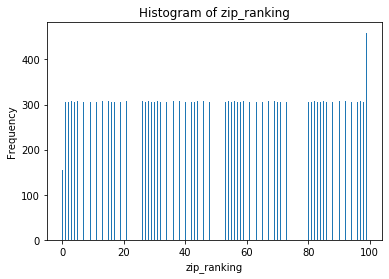

In [47]:
# visualize distribution of rank 
plt.hist(data['zip_ranking'], bins=550)
plt.title("Histogram of zip_ranking")
plt.xlabel("zip_ranking")
plt.ylabel("Frequency")
plt.show()

In [48]:
data = data.drop(['rank', 'zip_ranking', 'state'], axis=1)
data.head()

,commute_time_mins,avg_state,avg_city,zipcode
0,1.2,26.3,1.2,63057
1,2.1,27.0,2.1,95646
2,2.1,11.0,2.1,99548
3,2.2,11.0,2.2,99575
4,2.9,11.0,2.9,99546


In [49]:
data.to_csv('avg_commute_clean.csv', index=False)

In [50]:
clean = pd.read_csv('avg_commute_clean.csv')
clean.head()

,commute_time_mins,avg_state,avg_city,zipcode
0,1.2,26.3,1.2,63057
1,2.1,27.0,2.1,95646
2,2.1,11.0,2.1,99548
3,2.2,11.0,2.2,99575
4,2.9,11.0,2.9,99546
